# **Никифорова, Секачева, Зеленская, Куницына**
**3733802/20301**

Анализ прочности бетона на сжатие.

Наша цель: проанализировать представленные данные, посмотреть корреляцию данных состава и возраста (так как от этого зависит значение прочности), а также попробуем по количеству cуперпластификатора и возраста предсказать количество воды в бетоне.

In [165]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [166]:
df =  pd.read_excel("Данные для Collab.xls")

In [167]:
df.head(1030)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28.0,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28.0,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28.0,32.768036


In [168]:
new_columns = {'Cement (component 1)(kg in a m^3 mixture)': 'Cement', 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'Blast Furnace Slag', 'Fly Ash (component 3)(kg in a m^3 mixture)': 'Fly Ash','Water  (component 4)(kg in a m^3 mixture)': 'Water', 'Superplasticizer (component 5)(kg in a m^3 mixture)': 'Superplasticizer',  'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'Coarse Aggregate','Fine Aggregate (component 7)(kg in a m^3 mixture)': 'Fine Aggregate', 'Age (day)  ': 'Age','Concrete compressive strength(MPa, megapascals)': 'Concrete compressive strength' }
df = df.rename(columns=new_columns)

# **ОПИСАНИЕ ДАННЫХ**

Cement - Цемент (компонент 1) (кг в смеси м^3)

Blast Furnace Slag - Доменный шлак (компонент 2) (кг в смеси м^3)

Fly ash - Зола-унос (компонент 3) (кг в смеси м^3)

Water - Вода (компонент 4) (кг в смеси м^3)

Superplasticizer - Суперпластификатор (компонент 5) (кг в смеси м^3)

Coarse Aggregate - Крупный заполнитель (компонент 6) (кг в смеси м^3)

Fine Aggregate - Мелкий заполнитель (компонент 7) (кг в смеси м^3)

Age (day) - Возраст (сутки)

Concrete compressive strength - Прочность бетона на сжатие (МПа, мегапаскали)

In [169]:
df.head(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.296075


# **ИССЛЕДАВАНИЕ ДАННЫХ**

*Выводы:*

DataFrame содержит данные о 1033 образцах бетона, включая количество различных компонентов (цемент, шлак, зола, вода, суперпластификатор, крупный и мелкий заполнитель), возраст бетона и его прочность на сжатие. Анализ числовых харктеристик показал что есть строки(3 шт.), в которых есть пропущенные данные.  Все числовые переменные представлены в подходящих типах данных.

Стандартное отклонение значительно отличается для разных компонентов. Это указывает на то, что некоторые компоненты используются более равномерно (например, вода), чем другие (например, шлак).

Высокая корреляция между некоторыми компонентами и прочностью будет указывать на важную роль этих компонентов в определении прочности.



Размер датасета:

In [170]:
df.shape

(1033, 9)

Информация о типах данных и пропусках

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Cement                                            1030 non-null   float64
 1   Blast Furnace Slag                                1030 non-null   float64
 2   Fly Ash                                           1030 non-null   float64
 3   Water                                             1033 non-null   float64
 4   Superplasticizer                                  1030 non-null   float64
 5   Coarse Aggregate                                  1030 non-null   float64
 6   Fine Aggregate                                    1030 non-null   float64
 7   Age (day)                                         1030 non-null   float64
 8   Concrete compressive strength(MPa, megapascals)   1030 non-null   float64
dtypes: float64(9)
memory

Основные числовые характеристики

In [172]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1033.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.579784,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.327241,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [173]:
df.describe(include='float64')

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1033.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.579784,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.327241,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


# **ОДНОФАКТОРНЫЙ АНАЛИЗ**


In [174]:
df[['Age (day)','Cement']].describe()

,Age (day),Cement
count,1030.000000,1030.000000
mean,45.662136,281.165631
std,63.169912,104.507142
min,1.000000,102.000000
25%,7.000000,192.375000
50%,28.000000,272.900000
75%,56.000000,350.000000
max,365.000000,540.000000


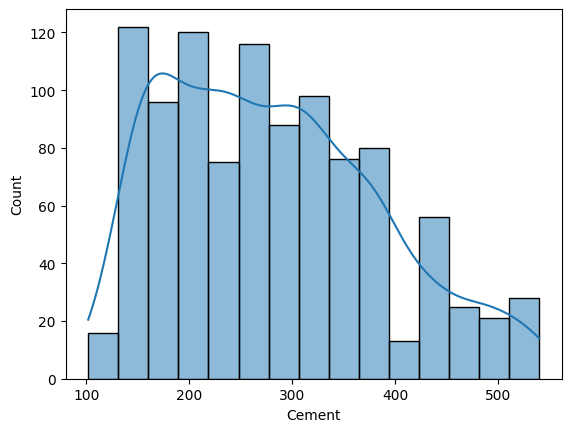

In [175]:
sns.histplot(df['Cement'], kde=True)
plt.show()

График отображает частоту различных значений количества цемента в бетонной смеси.  Гистограмма показывает количество образцов с количеством цемента в определенных интервалах.

*Выводы:*

Форма распределения: распределение скошено влево, это означает, что большинство значений количества цемента находятся в более высоком диапазоне. Среднее значение будет больше, чем медиана.

Наличие выбросов: выбросы есть.

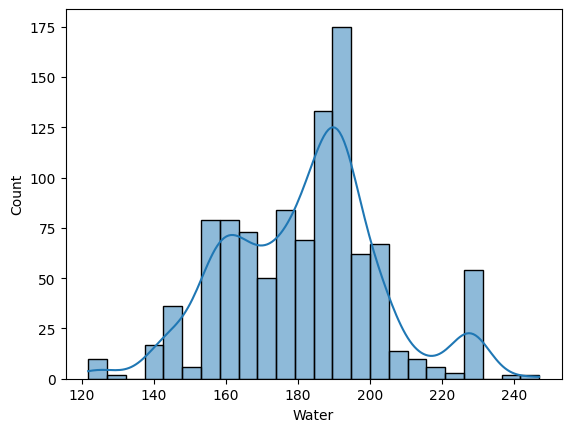

In [176]:
sns.histplot(df['Water'], kde=True)
plt.show()

График отображает частоту различных значений количества воды в бетонной смеси. Гистограмма показывает количество образцов с количеством воды в определенных интервалах.

*Выводы:*

Форма распределения:график приближен к нормальному распределению (имеет колкообразную прямую).

Наличие выбросов: выбросы есть.

Центральная тенденция: центр распределения имеет примерное значение медианны и моды ( от 185 до 189).


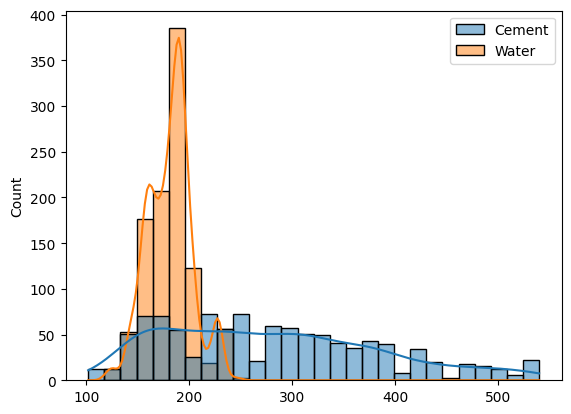

In [177]:
sns.histplot(df[['Cement','Water']], kde=True)
plt.show()


Столбчатая диаграмма показывает влияние различных количеств цемента и воды на прочность бетона. Оранжевые столбцы представляют количество цемента, а синие столбцы — количество воды. Высота столбцов соответствует прочности бетона.

Для обоих наборов данных (цемент и вода) наблюдаются следующие тенденции:

Для цемента: при увеличении количества цемента от 100 до 300  наблюдается увеличение прочности бетона. Максимальная прочность достигается при использовании цемента в точках 250-300. После этого увеличения количества цемента приводит к снижению прочности.

Для воды: с увеличением количества воды от 100 до 350+, прочность бетона сначала увеличивается, достигает максимума при значениях воды 350-375, затем уменьшается. При дальнейшем увеличении количества воды прочность начинает снижаться.

Эти данные могут использоваться для определения оптимальных соотношений цемента и воды для достижения максимальной прочности бетона.



In [178]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.000000,2.5,1040.0,676.0,28.0,79.986111
1,540.0,0.0,0.0,162.000000,2.5,1055.0,676.0,28.0,61.887366
2,332.5,142.5,0.0,228.000000,0.0,932.0,594.0,270.0,40.269535
3,332.5,142.5,0.0,228.000000,0.0,932.0,594.0,365.0,41.052780
4,198.6,132.4,0.0,192.000000,0.0,978.4,825.5,360.0,44.296075
...,...,...,...,...,...,...,...,...,...
1028,159.1,186.7,0.0,175.600000,11.3,989.6,788.9,28.0,32.768036
1029,260.9,100.5,78.3,200.600000,8.6,864.5,761.5,28.0,32.401235
1030,NaN,NaN,NaN,181.566359,NaN,NaN,NaN,NaN,NaN
1031,NaN,NaN,NaN,185.000000,NaN,NaN,NaN,NaN,NaN


In [179]:
mean = df['Water'].mean()

df['Water'].fillna(mean, inplace=True)

mean = df['Cement'].mean()

df['Cement'].fillna(mean, inplace=True)

mean = df['Superplasticizer'].mean()

df['Superplasticizer'].fillna(mean, inplace=True)

mean = df['Age (day)'].mean()

df['Age (day)'].fillna(mean, inplace=True)

<ipython-input-179-7909822b0682>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Water'].fillna(mean, inplace=True)
<ipython-input-179-7909822b0682>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

<Axes: >

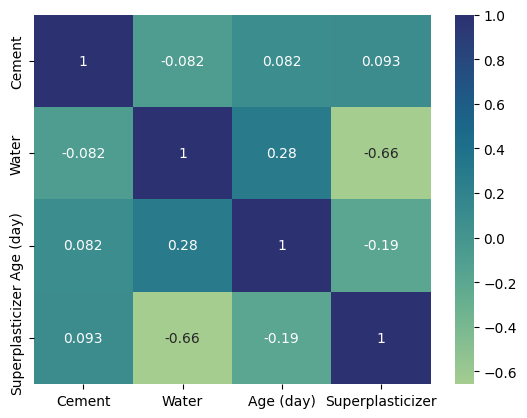

In [180]:
corr = df[['Cement','Water','Age (day)','Superplasticizer']].corr()
sns.heatmap(corr,annot=True, cmap="crest")

По данным *тепловой карты* есть возможность определить зависимость количества бетона от разных составляющих(вода, возрасть, суперпластификатор)

Выводы:

Следет отметить, сильную отрицательную корреляцию *количества воды* и *количества суперпластификатора* (= 0,66) по модулю, что может говорить о том, что избыток воды может снижать прочность, но суперпластификатор помогает компенсировать этот негативный эффект, улучшая текучесть смеси, даже при высоком водоцементном отношении.

Также менее высокая зависимость возникает между *водой* и *возрастом* (= 0,28 по модулю), что говорит о том, что влияние количества воды на прочностные характеристики бетона с течением времени может быть незначительным по сравнению с другими факторами.

Третья по величине корреляция равна 0.19 по модулю между *возрастом* и *суперпластификатором*, что говорит о том, что связь между показателями очень слабая и что при изменении одного, второй меняется мало.


<ipython-input-181-d67758a4531a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Water', y='Superplasticizer', data = df, palette='spring')


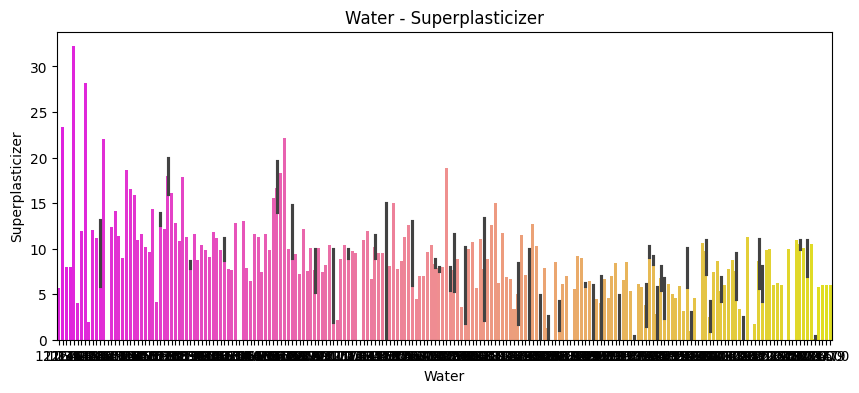

In [181]:
plt.figure(figsize=(10,4))

sns.barplot(x='Water', y='Superplasticizer', data = df, palette='spring')
plt.title('Water - Superplasticizer')
plt.show()

Данный столбчатую диаграмму (bar plot), которая отображает среднее значение количества суперпластификатора (Superplasticizer) для каждой категории количества воды (Water).

Анализируя график, стоит отметить, что наблюдается высокая изменчивость в потреблении суперпластификатора при низких уровнях воды, что может указывать на неэффективность процесса, а также что при высоких уровнях воды использование суперпластификатора стабилизируется, что свидетельствует об улучшении эффективности или предсказуемости процесса.

<ipython-input-182-cddf22aadaca>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Water', y='Age (day)', data = df, palette='winter')


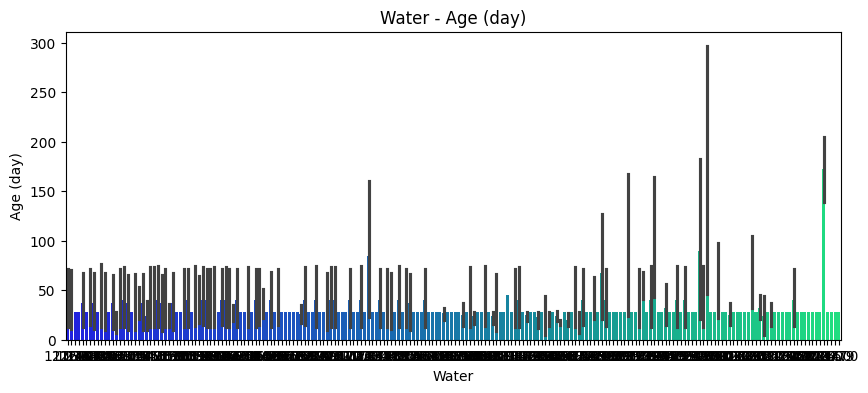

In [182]:
plt.figure(figsize=(10,4))

sns.barplot(x='Water', y='Age (day)', data = df, palette='winter')
plt.title('Water - Age (day)')
plt.show()

Данный столбчатую диаграмму (bar plot), которая отображает среднее значение количества суперпластификатора (Age(day)) для каждой категории количества воды (Water).

Проведя анализ графика, можно сделать вывод, что:


1.   Меньшее количество воды тесно связано с более молодым возрастом, что указывает либо на более короткие циклы использования, либо на ограниченный срок службы.
2.   Большее количество воды коррелирует с более широким диапазоном возрастов, включая значительные выбросы, представляющие собой более старые материалы.



<ipython-input-183-a213024342f5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Water', y='Superplasticizer', errorbar = "sd", data = df, palette='summer')


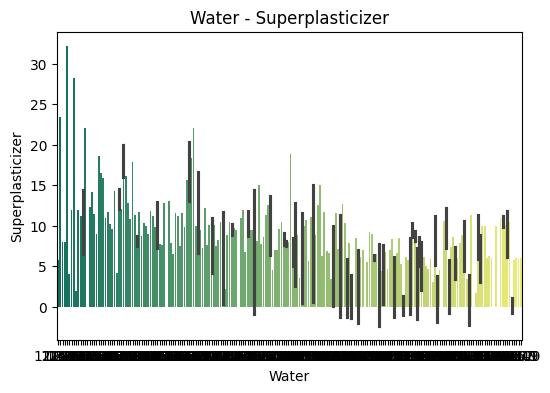

In [183]:
plt.figure(figsize=(6,4))

sns.barplot(x='Water', y='Superplasticizer', errorbar = "sd", data = df, palette='summer')
plt.title('Water - Superplasticizer')
plt.show()

Данный столбчатую диаграмму (bar plot), которая отображает среднее значение количества суперпластификатора (Superplasticizer) для каждой категории количества воды (Water).

Проведя анализ графика, можно сделать вывод, что:


1.   В нижнем диапазоне значений уровня воды (левая часть графика) наблюдается существенная изменчивость в использовании суперпластификатора, с некоторыми пиками, превышающими 30 единиц.  Это указывает на нестабильное использование суперпластификатора при низком уровне воды, что потенциально свидетельствует о неэффективности или отсутствии контроля процесса.
2.   В правой части графика, соответствующей более высоким уровням воды, использование суперпластификатора стабилизируется, со значениями преимущественно ниже 10 единиц. Это предполагает более предсказуемую связь между уровнем воды и количеством суперпластификатора по мере увеличения уровня воды.
3. Наиболее высокие пики в использовании суперпластификатора постепенно уменьшаются по мере увеличения уровня воды, что указывает на снижение экстремальных значений при высоких уровнях воды.



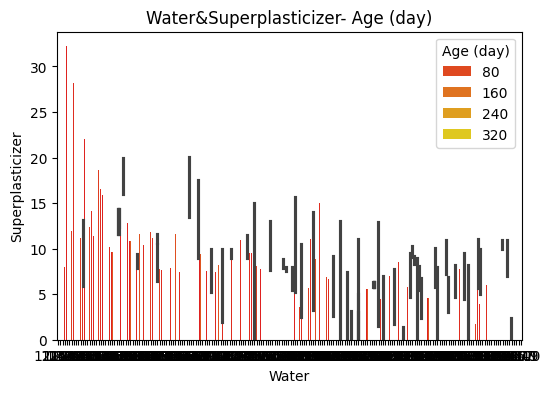

In [184]:
plt.figure(figsize=(6,4))

sns.barplot(x='Water', y='Superplasticizer', hue='Age (day)', data = df, palette='autumn')
plt.title('Water&Superplasticizer- Age (day)')
plt.show()

На представленной гистограмме показана зависимость прочности бетона от возраста образца (в днях), а также от содержания воды и суперпластификатора. Видно, что с возрастом образца прочность бетона увеличивается, особенно заметно это при увеличении концентрации суперпластификатора.

Таким образом, график демонстрирует, что добавление суперпластификатора и контроль за количеством воды положительно влияют на скорость роста прочности бетона в процессе его твердения.

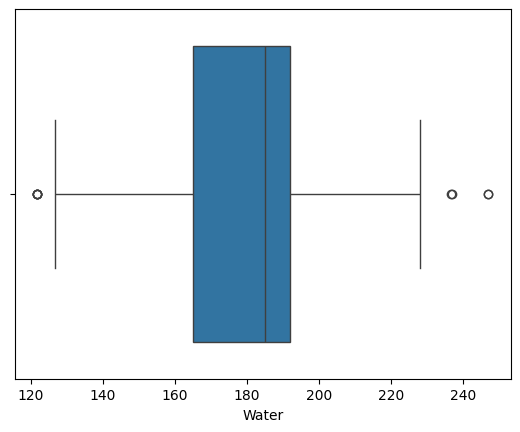

In [185]:
sns.boxplot(x="Water", data=df)
plt.show()

На предоставленной диаграмме изображен процесс упрочнения бетона. Гистограммы показывают изменение прочности бетона с течением времени (измеряемого в днях) при различных начальных уровнях содержания воды в бетонной смеси.

Согласно данным, можно сделать вывод, что начальный уровень содержания воды существенно влияет на конечную прочность бетона. Чем выше содержание воды в начале, тем ниже конечная прочность бетона. Также видно, что с течением времени прочность бетона увеличивается, однако разница между различными начальными уровнями содержания воды сохраняется.

Это подтверждает общее правило, что высокая влажность в бетонной смеси ведет к снижению прочности бетона.

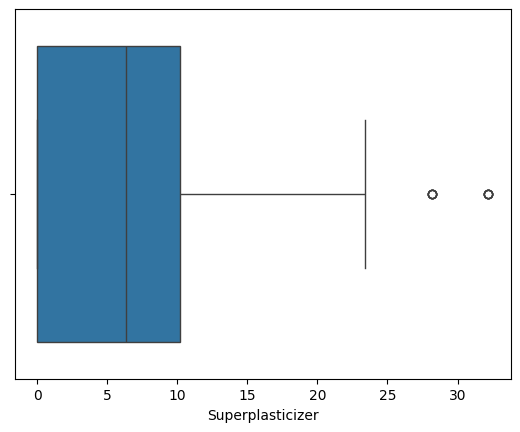

In [186]:
sns.boxplot(x="Superplasticizer", data=df)
plt.show()

На изображении представлен боксплот, который используется для визуализации распределения значений прочности бетона в зависимости от типа добавки. На графике видны три основных элемента: центральный столбец, показывающий медиану, усы, обозначающие интервал между первым и третьим квартилями, и точки, которые представляют отдельные наблюдения, выходящие за пределы усов.

Медиана, обозначенная центральным столбцом, находится ближе к правому краю графика, что указывает на то, что большинство значений прочности выше среднего значения. Усы начинаются слева от медианы и идут параллельно ей, затем поворачивают направо и заканчиваются там, где начинается следующий центральный столбец. Это указывает на то, что распределение значений несимметрично и имеет тенденцию к положительному скосу.

Отдельные точки, выходящие за пределы усов, свидетельствуют о наличии некоторых экстремальных значений, которые могут быть выбросами или результатами редких событий.

**БИНАРИЗАЦИЯ** **ДАННЫХ**

Предположим, что компания установила стандарты, согласно которым бетон первой категории признается тот, в котором содержание цемента больше или равно среднему значению цемента, содержание воды больше или равно среднему значению и показатель возраста больше или равно среднему значению.

In [187]:
passmark1 = df['Cement'].mean()
passmark2 = df['Water'].mean()
passmark3 = df['Age (day)'].mean()

In [188]:
df['Cement success'] = df['Cement'].apply(lambda x: 1 if x >= passmark1 else 0)
df['Water success'] = df['Water'].apply(lambda x: 1 if x >= passmark2 else 0)
df['Age (day) success'] = df['Age (day)'].apply(lambda x: 1 if x >= passmark3 else 0)

df['overall success'] = (df['Cement success'] + df['Water success'] + df['Age (day) success'] == 3)

In [189]:
df[['Cement success', 'Water success', 'Age (day) success','overall success']].sample(100)

,Cement success,Water success,Age (day) success,overall success
461,0,0,1,False
317,0,0,1,False
416,0,0,0,False
249,0,1,0,False
272,0,0,1,False
...,...,...,...,...
773,1,1,0,False
701,1,1,1,True
362,0,0,1,False
897,1,0,0,False


Доля успешных случаев:

In [190]:
len(df[df['overall success'] == 1]) / len(df)

0.07357212003872217

# МАШИННОЕ ОБУЧЕНИЕ

**Цель:** попробуем по количеству cуперпластификатора и возраста предсказать количество воды в бетоне.

Задача по построению линейной регрессионной модели.

In [191]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

features = ['Superplasticizer','Age (day)']
target = 'Water success'

Данные строчки кода помогают подготовить данные для дальнейшего прогнозирования.

In [192]:
X = df[features]
y = df[target]

In [193]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape

((774, 2), (259, 2))

In [194]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [195]:
y_pred = model.predict(X_test)

In [196]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.1237512511492617


MSE - среднекваратическая ошибка

In [197]:
for i, pred in enumerate(y_pred):
    print(f"Предсказанное значение количество воды в бетоне {i+1}: {pred}")

Предсказанное значение количество воды в бетоне 1: 0.2866698095511383
Предсказанное значение количество воды в бетоне 2: 0.3445793342847947
Предсказанное значение количество воды в бетоне 3: 0.8824973348065905
Предсказанное значение количество воды в бетоне 4: 0.3325321429529332
Предсказанное значение количество воды в бетоне 5: 0.8801645271566029
Предсказанное значение количество воды в бетоне 6: 0.3546989083466494
Предсказанное значение количество воды в бетоне 7: 0.8993824187493583
Предсказанное значение количество воды в бетоне 8: 0.8824973348065905
Предсказанное значение количество воды в бетоне 9: 0.5068440050949097
Предсказанное значение количество воды в бетоне 10: 0.6274035121315139
Предсказанное значение количество воды в бетоне 11: 0.8824973348065905
Предсказанное значение количество воды в бетоне 12: 0.8809421297065987
Предсказанное значение количество воды в бетоне 13: 0.8801645271566029
Предсказанное значение количество воды в бетоне 14: 0.17879268717037855
Предсказанное 

Задача на классификацию.

In [198]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)

In [199]:
pred[:10]

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 1])

In [200]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[107,  10],
       [ 23, 119]])

107 примеров были правильно классифицированы как класс 0 (TN).

10 примеров были ошибочно классифицированы как класс 1 (FP).

23 примеров были ошибочно классифицированы как класс 0 (FN).

1119 примеров были правильно классифицированы как класс 1 (TP).

In [201]:
model.coef_

array([[-3.91253071e-01, -3.61071466e-04]])

Первый коэффициент (-3.91253071e-01) соответствует первому признаку в вашем наборе
данных. Отрицательное значение означает, что увеличение этого признака уменьшает вероятность того, что пример будет отнесен к положительному классу (класс 1).
Второй коэффициент (-3.61071466e-04)  соответствует второму признаку.  Он также отрицателен, и его очень маленькая величина указывает на очень слабое отрицательное влияние этого признака на вероятность принадлежности к положительному классу.